# Estadisticas De Casos de COVID-19 en México y sus entidades
    Autor: Eduardo Alán Hernández Villasana
    Estudiante de Licenciatura en Ciencias Computacionales en
    la Universidad Autonoma de Nuevo León - Facultad de Ciencias Fisico Matemáticas

In [1]:
import pandas as ps
import os
import datetime as dt
import matplotlib.pyplot as plt
import time

In [2]:
# Función para invertir el dia y mes en el formato de fecha, esto para poder ordenar las fechas
def invertirLista (cadenas):
    cadenas_nueva = []
    for cadena in cadenas:
        elementos = cadena.split('-')
        cadenas_nueva.append (elementos[2] +"-"+ elementos[1] +"-"+ elementos[0])
    return cadenas_nueva

In [3]:
def agregarResultado (data_frame):
    RESULTADO = []
    for CL in data_frame["CLASIFICACION_FINAL"]:
        RESULTADO.append(obtenerResultado(CL))
    #print(RESULTADO)
    data_frame["RESULTADO"] = RESULTADO

In [4]:
def obtenerResultado (CLASIFICACION_FINAL):
    POSITIVO = [1,2,3]
    NEGATIVO = [4,5,7]
    SOSPECHOSO = 6

    if (CLASIFICACION_FINAL in POSITIVO):
        return 1
    elif (CLASIFICACION_FINAL in NEGATIVO):
        return 2
    else:
        return 3


In [5]:
# Función para obtener el dataframe desde un url, también calcula la fecha y obtiene el dataframe de el dia actual o el de ayer
def obtenerDataFrame (fecha = "hoy"):
    #url = "https://raw.githubusercontent.com/EduHdzVillasana/COVIDSTATSMX/master/Datos%20Abiertos"
    url = "C:/Users/alana/Documents/COVIDSTATSMX/Datos Abiertos"
    x = dt.date.today()
    fecha = str(x)
    sufijo = "COVID19MEXICO.csv"
    # 200617COVID19MEXICO.csv
    año = str(x.year - 2000)
    if x.month >= 10:
        mes = str(x.month)
    else:
        mes = "0" + str(x.month)
    
    if x.day >= 10:
        dia = str(x.day)
    else:
        dia = "0" + str(x.day)

    prefijo = año + mes + dia
    try:
        covid_df = ps.read_csv(url + "/" + prefijo + sufijo, encoding ='latin1')
        print ("DataSet obtenido de: \n" + url + "/" + prefijo + sufijo)
    except:
        x = x - dt.timedelta(days = 1)
        fecha = str(x)
        año = str(x.year - 2000)
        if x.month >= 10:
            mes = str(x.month)
        else:
            mes = "0" + str(x.month)
        
        if x.day >= 10:
            dia = str(x.day)
        else:
            dia = "0" + str(x.day)

        prefijo = año + mes + dia
        try:
            covid_df = ps.read_csv(url + "/" + prefijo + sufijo, encoding ='latin1')
            print ("DataSet obtenido de: \n" + url + "/" + prefijo + sufijo)
        except:
            covid_df = None
            fecha = "0"
    #print (dt.datetime.now() - x) Para medir el tiempo que se tarda en leer el dataset
    return covid_df, fecha

In [6]:
# Guarda un dataframe dependiendo de el nombre, el path y especificando que tipo de extencion y formatp
def guardarDataFrame (path = "C:", nombre = "DATAFRAME", tipo = ".xls", dataFrame = None):
    if tipo == ".csv":
        dataFrame.to_csv(os.path.join(path, nombre))
    elif tipo == ".xls":
        dataFrame.to_excel(os.path.join(path, nombre))
    elif tipo == ".json":
        dataFrame.to_json(os.path.join(path, nombre))

In [7]:
# Imprime los datos acumulados
def imprimirAcumulados (casosA):
    # variable que guarda el indice de letalidad en porcentaje
    inice_L = casosA["Defunciones"] / casosA["Positivos"] * 100
    # Variable que guarda el indice de positividad nacional
    indice_P = casosA["Positivos"] / (casosA["Negativos"] + casosA["Positivos"]) * 100
    print ("  Total de casos estudiados: " + str(casosA["Total"])+ "\n\n" +
            "  Casos Positivos a SARS-CoV-2: " + str(casosA["Positivos"])+ "\n\n" +
            "  Casos No Positivos a SARS-CoV-2: " + str(casosA["Negativos"])+ "\n\n" +
            "  Casos Con Resultado Pendiente: " + str(casosA["Pendientes"]) + "\n\n" +
            "  Defunciones Positivas a SARS-CoV-2: " + str(casosA["Defunciones"]) + "\n\n" +
            "  Tasa de Letalidad: %.3f%s\n\n  Tasa de Positividad : %.3f%s\n" % (inice_L,"%",indice_P,"%"))

In [8]:
# Guarda en un diccionario los casos acumulados
def obtenerCasosAcumulados (covid_df):
    # Data Frame que almacenará la columna RESULTADO donde 1 es positivo, 2 es negativo, 3 es pendiente y FECHA_DEF, donde si la fecha es diferente a 9999-99-99 es una defuncion
    #casos = ps.concat([covid_df["RESULTADO"], covid_df["FECHA_DEF"]], axis = 1)
    
    casos = covid_df[["RESULTADO", "FECHA_DEF"]]
    # Contador de los casos positivos
    positivos = len(casos[casos["RESULTADO"] == 1]) 
    # Contador de los casos negativos
    negativos = len(casos[casos["RESULTADO"] == 2])
    # Contador de los casos pendientes
    pendientes = len(casos[casos["RESULTADO"] == 3])
    # Contador de defunciones por covid-19
    defunciones = len(casos[(casos["RESULTADO"] == 1) & (casos["FECHA_DEF"] != "9999-99-99")])
    #print (casos.head())
    """
    for i in range (len(casos)):
        if casos["RESULTADO"][i] == 1:
            positivos += 1
            if casos ["FECHA_DEF"][i] != "9999-99-99":
                defunciones +=1
        elif casos["RESULTADO"][i] == 2:
            negativos += 1
        elif casos["RESULTADO"][i] == 3:
            pendientes +=1
    """
    return {"Positivos": positivos, "Negativos":negativos, "Pendientes":pendientes, "Defunciones": defunciones, "Total": len(casos)}

In [9]:
def obtenerListaFechas (hoy_s):
    i = dt.date(2020,1,1)
    hoy_l = hoy_s.split('-')
    hoy = dt.date(int(hoy_l[0]),int(hoy_l[1]),int(hoy_l[2]))
    p_fecha = str(i.year)+"-"+"0"+str(i.month)+"-"+"0"+str(i.day)
    fechas = [p_fecha]
    while i != hoy:
        i += dt.timedelta(days = 1)

        if (i.month < 10):
            month = "0"+str(i.month)
        else:
            month = str(i.month)
        
        if (i.day < 10):
            day = "0"+str(i.day)
        else:
            day = str(i.day)
        
        p_fecha = str(i.year)+"-"+month+"-"+day
        fechas.append(p_fecha)
    return fechas


In [32]:
# Filtra los datos y obtiene un diccionario con los casos registradps por dia
# Esta añadida la opcion de especificar el estado y la lista de municipios
def obtenerCasosPorDia (covid_df, estado = 0, municipios = []):
    # Lista que guarda las fechas de FECHA
    # Diccionario que guarda la posicion de las fechas
    pos_fechas = {}
    # Diccionario que se convertirá en Data Frame
    casosPorDia = {}
    # Se crean las listas que almacenarán los datos
    casosPorDia ["FECHA"] = []
    casosPorDia ["CASOS_POSITIVOS"] = []
    casosPorDia ["CASOS_NEGATIVOS"] = []
    casosPorDia ["CASOS_SOSPECHOSOS"] = []
    casosPorDia ["DEFUNCIONES"] = []
    total_Casos = len(covid_df)
    # Se crea la lista de las fechas
    
    # Se ordenan las fechas, debido al formato (dd/mm/aaaa) se tiene que invertir a (mm/dd/aaaa) para ordenarlo y después se devuelven a 
    # su posicion original
    #fechas = invertirLista(fechas)
    #fechas = invertirLista(fechas)
    casosPorDia ["FECHA"] = fechas
    # Se filtran los datos y se cuentan los casos positivos, negativos, sospechosos, y defunciones confirmadas por cada fecha
    # Para los casos positivos, negativos y sospechosos la columna "FECHA" representa su fecha de inicio de sintomas, 
    # mientras que para las defunciones, la columna "FECHA" representa la fecha de defunción.
    # No se debe olvidar que aqui solamente se muestran numeros frios, pero cada una de las defunciones representa una vida perdida.
    for fecha in casosPorDia["FECHA"]:
        casos = covid_df[["FECHA_SINTOMAS", "RESULTADO","FECHA_DEF"]][((covid_df["ENTIDAD_RES"] == estado) |( estado == 0)) 
        & ((covid_df["MUNICIPIO_RES"].isin (municipios)) | (len(municipios) == 0))]
        casos_S = casos[casos["FECHA_SINTOMAS"] == fecha]


        casos_P = casos_S[casos_S["RESULTADO"] == 1]

        casos_N = casos_S[casos_S["RESULTADO"] == 2]

        casos_S = casos_S[casos_S["RESULTADO"] == 3]

        Def = casos[(casos["FECHA_DEF"] == fecha) 
        & (casos["RESULTADO"] == 1)]

        casosPorDia ["CASOS_POSITIVOS"].append(len(casos_P))
        casosPorDia ["CASOS_NEGATIVOS"].append(len(casos_N))
        casosPorDia ["CASOS_SOSPECHOSOS"].append(len(casos_S))
        casosPorDia ["DEFUNCIONES"].append(len(Def))
    return casosPorDia

In [11]:
zonaMetroMty = [39,26,6,46,21,48,31,18,19,9,49,43]
NuevoLeon = 19
covid_df, fecha_actualizacion = obtenerDataFrame()

DataSet obtenido de: 
C:/Users/alana/Documents/COVIDSTATSMX/Datos Abiertos/201012COVID19MEXICO.csv


In [12]:
fechas = obtenerListaFechas(fecha_actualizacion)

In [13]:
agregarResultado(covid_df)

In [14]:
casosAcumulados = obtenerCasosAcumulados(covid_df)
imprimirAcumulados (casosAcumulados)

  Total de casos estudiados: 2093408

  Casos Positivos a SARS-CoV-2: 821045

  Casos No Positivos a SARS-CoV-2: 1020891

  Casos Con Resultado Pendiente: 251472

  Defunciones Positivas a SARS-CoV-2: 83945

  Tasa de Letalidad: 10.224%

  Tasa de Positividad : 44.575%



In [33]:
casosPorDia_dict = obtenerCasosPorDia(covid_df)
casosPorDia_df = ps.DataFrame(casosPorDia_dict)
guardarDataFrame (path = "C:/Users/alana/Documents/COVIDSTATS/CASOSPORDIA",
nombre = fecha_actualizacion + "-NACIONAL.xls",
tipo = ".xls",
dataFrame = casosPorDia_df)

In [34]:
casosPorDia_df.head()

,FECHA,CASOS_POSITIVOS,CASOS_NEGATIVOS,CASOS_SOSPECHOSOS,DEFUNCIONES
0,2020-01-01,0,155,133,0
1,2020-01-02,0,120,114,0
2,2020-01-03,0,135,113,0
3,2020-01-04,0,138,107,0
4,2020-01-05,0,189,164,0


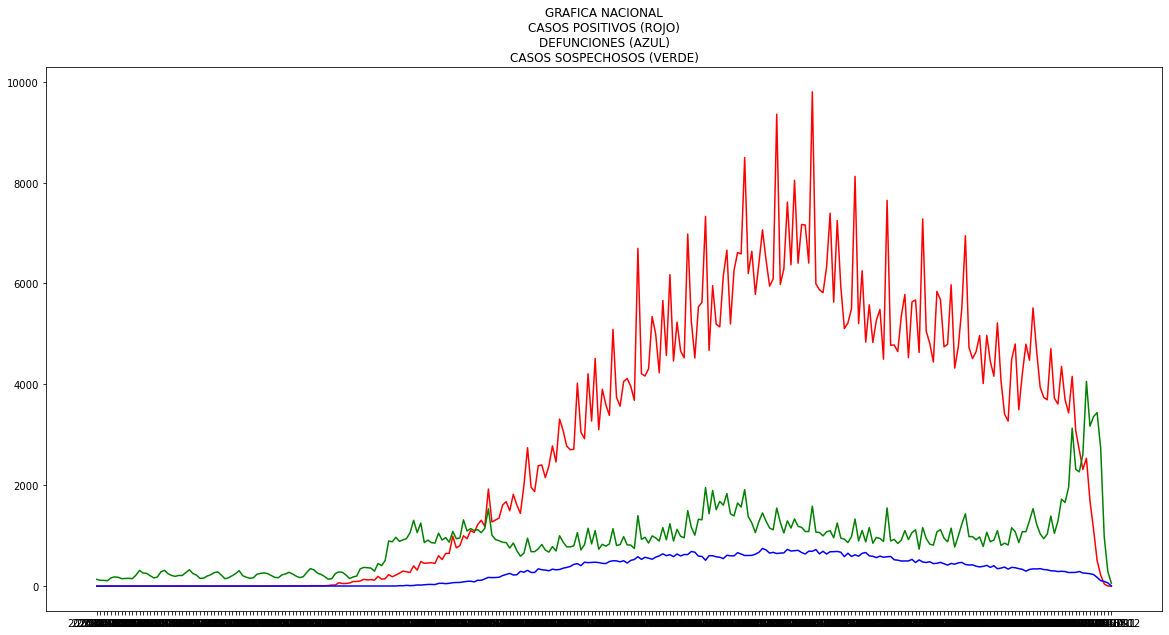

In [40]:
%matplotlib inline
plt.figure(figsize = (20,10))
plt.plot(casosPorDia_df["FECHA"],casosPorDia_df["CASOS_POSITIVOS"],"r")
plt.plot(casosPorDia_df["FECHA"],casosPorDia_df["DEFUNCIONES"],"b")
plt.plot(casosPorDia_df["FECHA"],casosPorDia_df["CASOS_SOSPECHOSOS"],"g")
plt.title("GRAFICA NACIONAL\nCASOS POSITIVOS (ROJO)\nDEFUNCIONES (AZUL)\nCASOS SOSPECHOSOS (VERDE)")
plt.savefig("../Graficas/NACIONAL/"+fecha_actualizacion + "-NACIONAL.png")

In [18]:
#casosPorDia_dict = obtenerCasosPorDia(covid_df, NuevoLeon, zonaMetroMty)
#ZM_MTY_df = ps.DataFrame(casosPorDia_dict)

#guardarDataFrame (path = "C:/Users/alana/Documents/COVIDSTATS/CASOSPORDIA",
#nombre = fecha_actualizacion + "-ZONA-METRO-MTY.xls",
#tipo = ".xls",
#dataFrame = ZM_MTY_df)

In [19]:
#%matplotlib inline
#plt.plot(ZM_MTY_df["FECHA"],ZM_MTY_df["CASOS_POSITIVOS"],"r")
#plt.plot(ZM_MTY_df["FECHA"],ZM_MTY_df["DEFUNCIONES"],"b")
#plt.title("CASOS POSITIVOS NUEVO LEÓN (ROJO)\nDEFUNCIONES NUEVO LEÓN (AZUL)")

In [20]:
#Tamaulipas = 28;
#casosPorDia_dict = obtenerCasosPorDia(covid_df, Tamaulipas)
#TAM_df = ps.DataFrame(casosPorDia_dict)

#guardarDataFrame (path = "C:/Users/alana/Documents/COVIDSTATS/CASOSPORDIA",
#nombre = fecha_actualizacion + "-TAMAULIPAS.xls",
#tipo = ".xls",
#dataFrame = TAM_df)


In [21]:
#%matplotlib inline
#plt.plot(TAM_df["FECHA"],TAM_df["CASOS_POSITIVOS"],"r")
#plt.plot(TAM_df["FECHA"],TAM_df["DEFUNCIONES"],"b")
#plt.title("CASOS POSITIVOS TAMAULIPAS (ROJO)\nDEFUNCIONES TAMAULIPAS (AZUL)")

In [22]:
#CdVictoria = [41]
#casosPorDia_dict = obtenerCasosPorDia(covid_df, Tamaulipas, CdVictoria)
#CD_VIC_df = ps.DataFrame(casosPorDia_dict)
#print(CD_VIC_df.head())

#guardarDataFrame (path = "C:/Users/alana/Documents/COVIDSTATS/CASOSPORDIA",
#nombre = fecha_actualizacion + "-CD_VICTORIA_TAMAULIPAS.xls",
#tipo = ".xls",
#dataFrame = CD_VIC_df)

In [23]:
#%matplotlib inline
#plt.plot(CD_VIC_df["FECHA"],CD_VIC_df["CASOS_POSITIVOS"],"r")
#plt.plot(CD_VIC_df["FECHA"],CD_VIC_df["DEFUNCIONES"],"b")
#plt.title("CASOS POSITIVOS CD. VICTORIA TAMAULIPAS (ROJO)\nDEFUNCIONES CD. VICTORIA TAMAULIPAS (AZUL)")

## Muertes por millon por estado

In [24]:
poblacion = ps.read_csv("../Poblacion/Poblacion.csv")

In [26]:
for estado_id in poblacion["CLAVE"]:
    muertes = covid_df[(covid_df["ENTIDAD_RES"] == estado_id)
    & (covid_df["RESULTADO"] == 1)
    & (covid_df["FECHA_DEF"] != "9999-99-99")]
    estado = poblacion[poblacion["CLAVE"] == estado_id]["ESTADO"].tolist()[0]
    print (estado + ": " + str(len(muertes)))

AGUASCALIENTES: 684
BAJA CALIFORNIA: 3695
BAJA CALIFORNIA SUR: 553
CAMPECHE: 842
CHIAPAS: 1135
CHIHUAHUA: 1491
CIUDAD DE MÉXICO: 10812
COAHUILA DE ZARAGOZA: 2022
COLIMA: 586
DURANGO: 697
ESTADO DE MÉXICO: 13086
GUANAJUATO: 3131
GUERRERO: 2075
HIDALGO: 2092
JALISCO: 3562
MICHOACÁN DE OCAMPO: 1801
MORELOS: 1131
NAYARIT: 784
NUEVO LEÓN: 3331
OAXACA: 1569
PUEBLA: 4425
QUERÉTARO: 1012
QUINTANA ROO: 1751
SAN LUIS POTOSÍ: 1801
SINALOA: 3400
SONORA: 2983
TABASCO: 2904
TAMAULIPAS: 2401
TLAXCALA: 1134
VERACRUZ DE IGNACIO DE LA LLAVE: 4619
YUCATÁN: 1646
ZACATECAS: 790
